In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3MB 4.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=1c64f3a9cc608ceb7a30be2ae70f06b8eec99bc4b020756222295677458c3be5
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from sklearn.svm import SVR
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime


In [ ]:
import yfinance as yf

In [ ]:
ticker = 'AMZN'
AMZNData = yf.Ticker(ticker)

In [ ]:
amzn_df = AMZNData.history(period='1d', start= '2011-1-1', end = '2021-5-18')

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,181.369995,186.000000,181.210007,184.220001,5331400,0,0
2011-01-04,186.149994,187.699997,183.779999,185.009995,5031800,0,0
2011-01-05,184.100006,187.449997,184.070007,187.419998,3418800,0,0
2011-01-06,186.500000,187.410004,185.250000,185.860001,3179700,0,0
2011-01-07,187.880005,188.449997,183.740005,185.490005,5221700,0,0
...,...,...,...,...,...,...,...
2021-05-11,3136.280029,3238.000000,3127.370117,3223.909912,4619800,0,0
2021-05-12,3185.000000,3207.939941,3133.100098,3151.939941,4936400,0,0
2021-05-13,3185.469971,3203.840088,3133.000000,3161.469971,3350900,0,0


In [ ]:
for col in amzn_df.columns:
  print (col)

Open
High
Low
Close
Volume
Dividends
Stock Splits


In [ ]:
amzn_df.reset_index(inplace=True)
amzn_df.set_index('Date', inplace=True)

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,181.369995,186.000000,181.210007,184.220001,5331400,0,0
2011-01-04,186.149994,187.699997,183.779999,185.009995,5031800,0,0
2011-01-05,184.100006,187.449997,184.070007,187.419998,3418800,0,0
2011-01-06,186.500000,187.410004,185.250000,185.860001,3179700,0,0
2011-01-07,187.880005,188.449997,183.740005,185.490005,5221700,0,0
...,...,...,...,...,...,...,...
2021-05-11,3136.280029,3238.000000,3127.370117,3223.909912,4619800,0,0
2021-05-12,3185.000000,3207.939941,3133.100098,3151.939941,4936400,0,0
2021-05-13,3185.469971,3203.840088,3133.000000,3161.469971,3350900,0,0


In [ ]:
df_Open=amzn_df[['Open']]
df_dates=amzn_df.index.to_frame().reset_index(drop=True)
print(df_dates)

           Date
0    2011-01-03
1    2011-01-04
2    2011-01-05
3    2011-01-06
4    2011-01-07
...         ...
2605 2021-05-11
2606 2021-05-12
2607 2021-05-13
2608 2021-05-14
2609 2021-05-17

[2610 rows x 1 columns]


In [ ]:
#amzn_df = pd.concat([amzn_df, df_dates])

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,181.369995,186.000000,181.210007,184.220001,5331400,0,0
2011-01-04,186.149994,187.699997,183.779999,185.009995,5031800,0,0
2011-01-05,184.100006,187.449997,184.070007,187.419998,3418800,0,0
2011-01-06,186.500000,187.410004,185.250000,185.860001,3179700,0,0
2011-01-07,187.880005,188.449997,183.740005,185.490005,5221700,0,0
...,...,...,...,...,...,...,...
2021-05-11,3136.280029,3238.000000,3127.370117,3223.909912,4619800,0,0
2021-05-12,3185.000000,3207.939941,3133.100098,3151.939941,4936400,0,0
2021-05-13,3185.469971,3203.840088,3133.000000,3161.469971,3350900,0,0


In [ ]:
 #df_dates['Date']

In [ ]:
#a#mzn_df=amzn_df.append(df_dates)

In [ ]:
amzn_df['Date']= df_dates['Date'].values

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2011-01-03,181.369995,186.000000,181.210007,184.220001,5331400,0,0,2011-01-03
2011-01-04,186.149994,187.699997,183.779999,185.009995,5031800,0,0,2011-01-04
2011-01-05,184.100006,187.449997,184.070007,187.419998,3418800,0,0,2011-01-05
2011-01-06,186.500000,187.410004,185.250000,185.860001,3179700,0,0,2011-01-06
2011-01-07,187.880005,188.449997,183.740005,185.490005,5221700,0,0,2011-01-07
...,...,...,...,...,...,...,...,...
2021-05-11,3136.280029,3238.000000,3127.370117,3223.909912,4619800,0,0,2021-05-11
2021-05-12,3185.000000,3207.939941,3133.100098,3151.939941,4936400,0,0,2021-05-12
2021-05-13,3185.469971,3203.840088,3133.000000,3161.469971,3350900,0,0,2021-05-13


In [ ]:
amzn_df['Date'] = amzn_df['Date'].astype(str)

In [ ]:
amzn_df['new_date'] = amzn_df['Date'].str.replace('\D', '').astype(int)

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2011-01-03,181.369995,186.000000,181.210007,184.220001,5331400,0,0,2011-01-03,20110103
2011-01-04,186.149994,187.699997,183.779999,185.009995,5031800,0,0,2011-01-04,20110104
2011-01-05,184.100006,187.449997,184.070007,187.419998,3418800,0,0,2011-01-05,20110105
2011-01-06,186.500000,187.410004,185.250000,185.860001,3179700,0,0,2011-01-06,20110106
2011-01-07,187.880005,188.449997,183.740005,185.490005,5221700,0,0,2011-01-07,20110107
...,...,...,...,...,...,...,...,...,...
2021-05-11,3136.280029,3238.000000,3127.370117,3223.909912,4619800,0,0,2021-05-11,20210511
2021-05-12,3185.000000,3207.939941,3133.100098,3151.939941,4936400,0,0,2021-05-12,20210512
2021-05-13,3185.469971,3203.840088,3133.000000,3161.469971,3350900,0,0,2021-05-13,20210513


In [ ]:
actual_price = amzn_df.tail(1)
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,3245.929932,3292.75,3234.590088,3270.389893,3723900,0,0,2021-05-17,20210517


In [ ]:
x=actual_price['Close']
list2=[]
list2.append(x)
list2

y= 1+ list2[0]
print(list2[0])
print(y)

len(list2)


Date
2021-05-17    3270.389893
Name: Close, dtype: float64
Date
2021-05-17    3271.389893
Name: Close, dtype: float64


1

In [ ]:
amzn_df = amzn_df.head(len(amzn_df)-1)

In [ ]:
days = list()
close_prices= list()

In [ ]:
df_days = amzn_df.loc[:,'new_date']
df_days

Date
2011-01-03    20110103
2011-01-04    20110104
2011-01-05    20110105
2011-01-06    20110106
2011-01-07    20110107
                ...   
2021-05-10    20210510
2021-05-11    20210511
2021-05-12    20210512
2021-05-13    20210513
2021-05-14    20210514
Name: new_date, Length: 2609, dtype: int64

In [ ]:
df_close_price = amzn_df.loc[:,'Close']

In [ ]:
for dates in df_days:
  days.append([int(dates)])

days

In [ ]:
for price in df_close_price: 
  close_prices.append(float(price))

close_prices

In [ ]:
print(days)
print(close_prices)

print(len(days))
print(len(close_prices))

[[20110103], [20110104], [20110105], [20110106], [20110107], [20110110], [20110111], [20110112], [20110113], [20110114], [20110118], [20110119], [20110120], [20110121], [20110124], [20110125], [20110126], [20110127], [20110128], [20110131], [20110201], [20110202], [20110203], [20110204], [20110207], [20110208], [20110209], [20110210], [20110211], [20110214], [20110215], [20110216], [20110217], [20110218], [20110222], [20110223], [20110224], [20110225], [20110228], [20110301], [20110302], [20110303], [20110304], [20110307], [20110308], [20110309], [20110310], [20110311], [20110314], [20110315], [20110316], [20110317], [20110318], [20110321], [20110322], [20110323], [20110324], [20110325], [20110328], [20110329], [20110330], [20110331], [20110401], [20110404], [20110405], [20110406], [20110407], [20110408], [20110411], [20110412], [20110413], [20110414], [20110415], [20110418], [20110419], [20110420], [20110421], [20110425], [20110426], [20110427], [20110428], [20110429], [20110502], [20

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 1E-5)
rbf.fit(days, close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

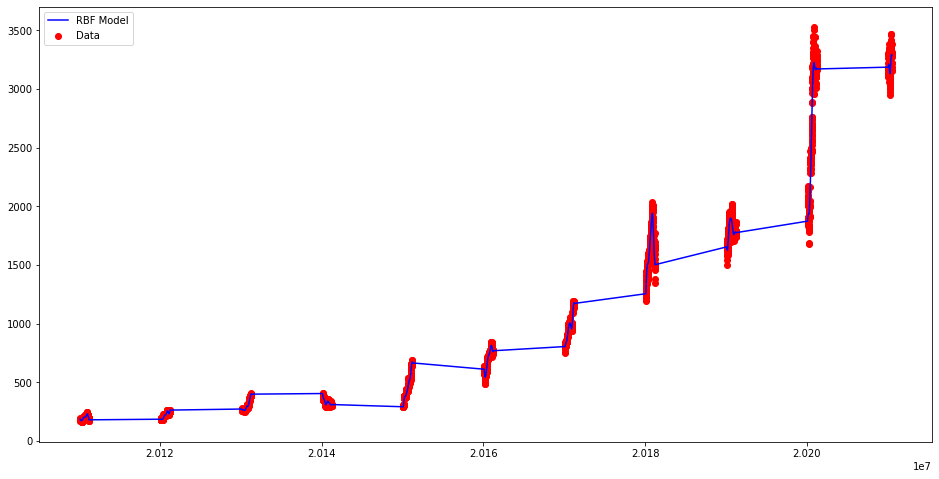

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, rbf.predict(days), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,3245.929932,3292.75,3234.590088,3270.389893,3723900,0,0,2021-05-17,20210517


In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(rbf.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [3282.18431041]
The percent error for this is:  0.36063926340748614 %


In [ ]:
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

The predicted value on 2021-05-05 from the rbf model is:  [3292.92146587]
The percent error for this is:  0.6843354880934155 %


In [ ]:
tomorrow = [[20210506]]
print('The predicted value on 2021-05-06 from the rbf model is: ' , rbf.predict(tomorrow))
print('It\'s predicted to drop: ' , float(((3146.3458-3249.386427)/3146.3458)*100), '%')

The predicted value on 2021-05-06 from the rbf model is:  [3292.23460979]
It's predicted to drop:  -3.2749301427706974 %


# RBF Unfixed

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 0.15)
rbf.fit(days, close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

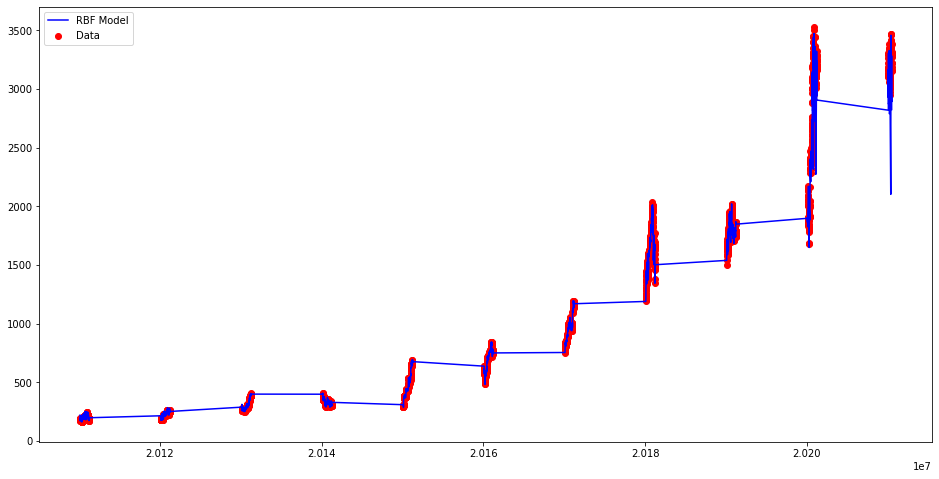

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, rbf.predict(days), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(rbf.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [1328.50654933]
The percent error for this is:  59.377733257230325 %


In [ ]:
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

The predicted value on 2021-05-05 from the rbf model is:  [3270.63977013]
The percent error for this is:  0.0030505704322229773 %


# Linear

In [ ]:
lin = SVR(kernel= 'linear',C= 1E-8)
lin.fit(days, close_prices) 

SVR(C=1e-08, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

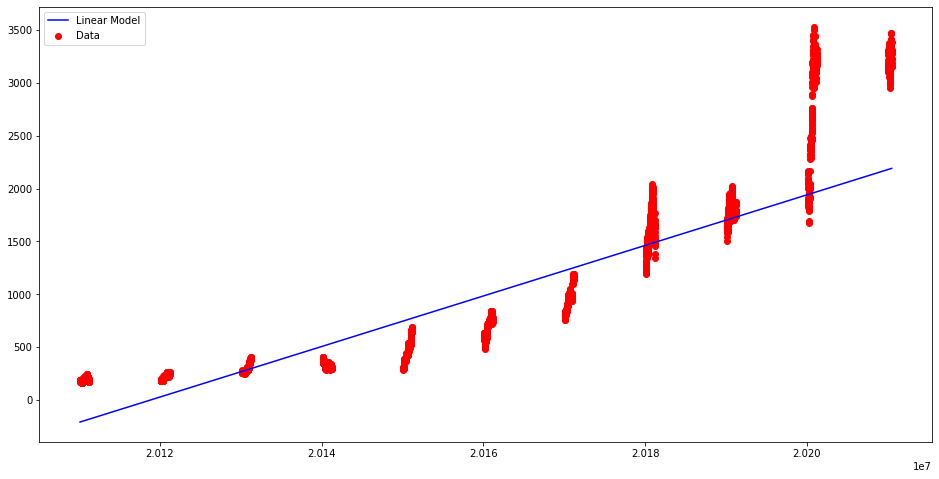

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, lin.predict(days), color='blue', label='Linear Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' ,lin.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(lin.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [2191.14735504]
The percent error for this is:  33.000426400522464 %


# 05-02-2020 - Now 

In [ ]:
amzn_df2 = AMZNData.history(period='1d', start= '2020-5-2', end = '2021-5-18')

In [ ]:
amzn_df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-04,2256.379883,2326.979980,2256.379883,2315.989990,4865900,0,0
2020-05-05,2340.000000,2351.000000,2307.129883,2317.800049,3242500,0,0
2020-05-06,2329.439941,2357.449951,2320.000000,2351.260010,3117800,0,0
2020-05-07,2374.780029,2376.000000,2343.110107,2367.610107,3396400,0,0
2020-05-08,2372.139893,2387.239990,2357.000000,2379.610107,3206600,0,0
...,...,...,...,...,...,...,...
2021-05-11,3136.280029,3238.000000,3127.370117,3223.909912,4619800,0,0
2021-05-12,3185.000000,3207.939941,3133.100098,3151.939941,4936400,0,0
2021-05-13,3185.469971,3203.840088,3133.000000,3161.469971,3350900,0,0


In [ ]:
df_Open=amzn_df2[['Open']]
df_dates2=amzn_df2.index.to_frame().reset_index(drop=True)
print(df_dates2)

          Date
0   2020-05-04
1   2020-05-05
2   2020-05-06
3   2020-05-07
4   2020-05-08
..         ...
257 2021-05-11
258 2021-05-12
259 2021-05-13
260 2021-05-14
261 2021-05-17

[262 rows x 1 columns]


In [ ]:
amzn_df2['Date']= df_dates2['Date'].values

In [ ]:
amzn_df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2020-05-04,2256.379883,2326.979980,2256.379883,2315.989990,4865900,0,0,2020-05-04
2020-05-05,2340.000000,2351.000000,2307.129883,2317.800049,3242500,0,0,2020-05-05
2020-05-06,2329.439941,2357.449951,2320.000000,2351.260010,3117800,0,0,2020-05-06
2020-05-07,2374.780029,2376.000000,2343.110107,2367.610107,3396400,0,0,2020-05-07
2020-05-08,2372.139893,2387.239990,2357.000000,2379.610107,3206600,0,0,2020-05-08
...,...,...,...,...,...,...,...,...
2021-05-11,3136.280029,3238.000000,3127.370117,3223.909912,4619800,0,0,2021-05-11
2021-05-12,3185.000000,3207.939941,3133.100098,3151.939941,4936400,0,0,2021-05-12
2021-05-13,3185.469971,3203.840088,3133.000000,3161.469971,3350900,0,0,2021-05-13


In [ ]:
amzn_df2['Date'] = amzn_df2['Date'].astype(str)

In [ ]:
amzn_df2['new_date'] = amzn_df2['Date'].str.replace('\D', '').astype(int)

In [ ]:
actual_price2 = amzn_df2.tail(1)
actual_price2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,3245.929932,3292.75,3234.590088,3270.389893,3723900,0,0,2021-05-17,20210517


In [ ]:
amzn_df2 = amzn_df2.head(len(amzn_df2)-1)

In [ ]:
days2 = list()
close_prices2= list()

In [ ]:
df_days2 = amzn_df2.loc[:,'new_date']
df_days2

Date
2020-05-04    20200504
2020-05-05    20200505
2020-05-06    20200506
2020-05-07    20200507
2020-05-08    20200508
                ...   
2021-05-10    20210510
2021-05-11    20210511
2021-05-12    20210512
2021-05-13    20210513
2021-05-14    20210514
Name: new_date, Length: 261, dtype: int64

In [ ]:
df_close_price2 = amzn_df2.loc[:,'Close']

In [ ]:
for dates2 in df_days2:
  days2.append([int(dates2)])

days2

In [ ]:
for price2 in df_close_price2: 
  close_prices2.append(float(price2))

close_prices2

In [ ]:
print(days2)
print(close_prices2)

print(len(days2))
print(len(close_prices2))

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 0.1)
rbf.fit(days2, close_prices2)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

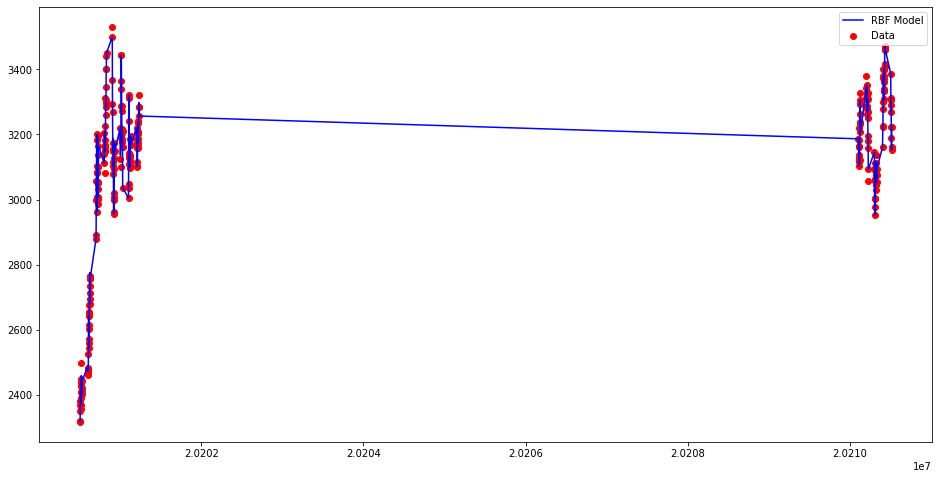

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days2,close_prices2, color= 'red', label= 'Data')
plt.plot(days2, rbf.predict(days2), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(rbf.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [3234.60502086]
The percent error for this is:  1.0942113674687164 %


In [ ]:
#Today
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

The predicted value on 2021-05-05 from the rbf model is:  [3271.50642031]
The percent error for this is:  0.029549258318019647 %


In [ ]:
#Tomorrow
tomorrow = [[20210518]]
print('The predicted value on 2021-05-06 from the rbf model is: ' , rbf.predict(tomorrow))
print('The percent error for this is: ', float((abs(3232.28-(rbf.predict(tomorrow)))/3232.28)*100),'%')

The predicted value on 2021-05-06 from the rbf model is:  [3175.87822875]
The percent error for this is:  1.7449531366998443 %


In [ ]:
twoDays = [[20210507]]
print('The predicted value on 2021-05-07 from the rbf model is: ' , rbf.predict(twoDays))

The predicted value on 2021-05-07 from the rbf model is:  [3291.71005051]
